In [52]:
import numpy as np
import matplotlib.pyplot as plt


In [53]:
def simple_1d_convolution(input_signal, kernel):
    # 1. 翻转卷积核（离散一维卷积的关键步骤）
    flipped_kernel = np.flip(kernel)

    # 2. 计算输出结果长度（无填充场景：输入长度 - 卷积核长度 + 1）
    output_length = len(input_signal) - len(flipped_kernel) + 1
    conv_result = np.zeros(output_length, dtype=np.int32)

    # 3. 滑动卷积核，逐位置相乘求和（核心流程）
    for i in range(output_length):
        # 截取当前对齐的输入区域，逐元素相乘后求和
        input_roi = input_signal[i:i+len(flipped_kernel)]
        conv_result[i] = np.sum(input_roi * flipped_kernel)

    return conv_result

In [54]:
input_signal = np.array([1, 2, 3, 4, 5, 6, 7])  # 输入信号
conv_kernel = np.array([0, 1, 2])               # 卷积核

result = simple_1d_convolution(input_signal, conv_kernel)

print(f"输入信号：{input_signal}")
print(f"卷积核：{conv_kernel}")
print(f"卷积结果：{result}")

输入信号：[1 2 3 4 5 6 7]
卷积核：[0 1 2]
卷积结果：[ 4  7 10 13 16]


In [55]:
def simple_1d_convolution_with_padding(input_signal, kernel, padding=0):
    """
    极简版离散一维卷积（支持零填充、无填充、步长=1）
    参数：
        input_signal：一维输入信号数组
        kernel：一维卷积核数组
        padding：左右两侧各补0的个数，默认0（无填充）
    返回：
        卷积结果数组
    """
    # 1. 对输入信号进行零填充（左右两侧各补padding个0）
    padded_signal = np.pad(input_signal, pad_width=padding, mode='constant', constant_values=0)

    # 2. 翻转卷积核（离散一维卷积的关键步骤）
    flipped_kernel = np.flip(kernel)

    # 3. 计算输出结果长度（填充后：输入长度 + 2*padding - 卷积核长度 + 1）
    output_length = len(padded_signal) - len(flipped_kernel) + 1
    conv_result = np.zeros(output_length, dtype=np.int32)

    # 4. 滑动卷积核，逐位置相乘求和（核心流程）
    for i in range(output_length):
        # 截取当前对齐的填充区域，逐元素相乘后求和
        input_roi = padded_signal[i:i+len(flipped_kernel)]
        conv_result[i] = np.sum(input_roi * flipped_kernel)

    return conv_result

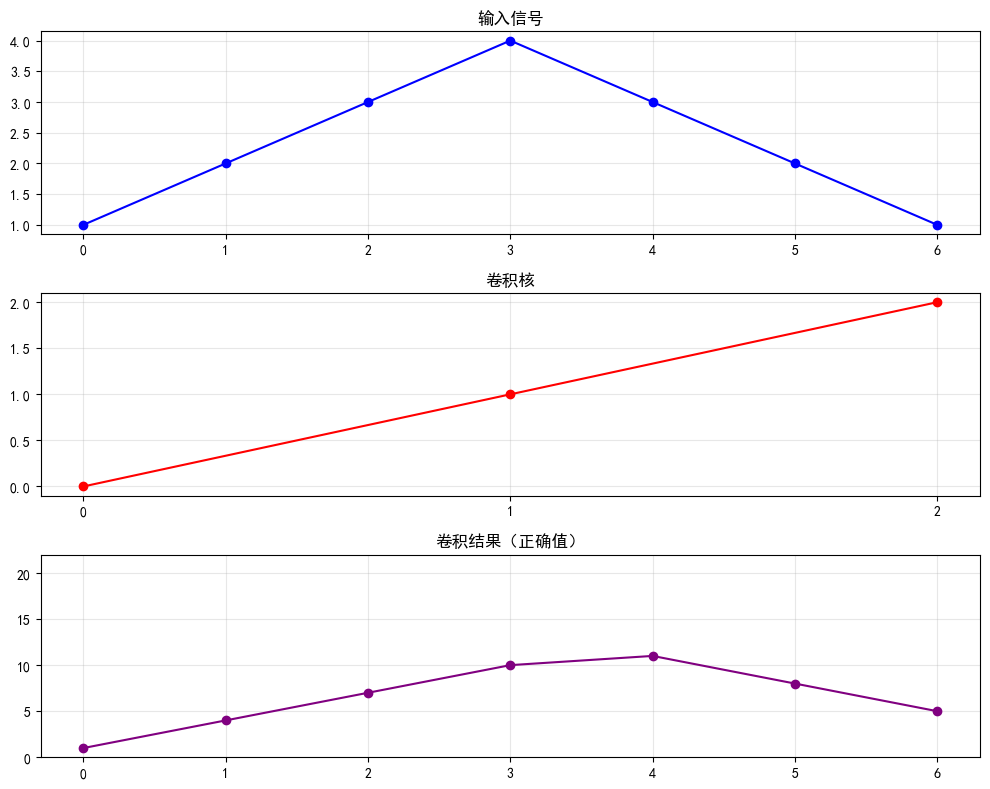

原始输入信号：[1 2 3 4 3 2 1]
卷积核：[0 1 2]
左右各补0个数：1
卷积结果：[ 1  4  7 10 11  8  5]
卷积结果长度：7


In [56]:
input_signal = np.array([1, 2, 3, 4, 3, 2, 1])  # 输入信号
conv_kernel = np.array([0, 1, 2])               # 卷积核
padding_num = 1

result = simple_1d_convolution_with_padding(input_signal, conv_kernel, padding=padding_num)

plt.figure(1, figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.title('输入信号')
x1 = np.arange(len(input_signal))
plt.plot(x1, input_signal, marker='o', color='blue')
plt.xticks(x1)
plt.grid(alpha=0.3)

plt.subplot(3, 1, 2)
plt.title('卷积核')
x2 = np.arange(len(conv_kernel))
plt.plot(x2, conv_kernel, marker='o', color='red')
plt.xticks(x2)
plt.grid(alpha=0.3)

plt.subplot(3, 1, 3)
plt.title('卷积结果（正确值）')
x3 = np.arange(len(result))
plt.plot(x3, result, marker='o', color='purple')
plt.xticks(x3)
plt.ylim(0, 22)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"原始输入信号：{input_signal}")
print(f"卷积核：{conv_kernel}")
print(f"左右各补0个数：{padding_num}")
print(f"卷积结果：{result}")
print(f"卷积结果长度：{len(result)}")

In [57]:
import numpy as np
def continuous_convolution_valid(f, g, t_range, dt=0.001):
    tau = np.arange(t_range[0]-3, t_range[1]+3, dt)
    t_list = np.arange(t_range[0], t_range[1], dt)
    h_list = []
    for t in t_list:
        g_shifted = g(t - tau)
        h_t = np.sum(f(tau) * g_shifted) * dt
        h_list.append(h_t)
    return np.array(t_list), np.array(h_list)
def rect_f(t):
    return np.where((t >= 0) & (t <= 1), 1.0, 0.0)
def rect_g(t):
    return np.where((t >= 0) & (t <= 2), 1.0, 0.0)
t, h = continuous_convolution_valid(rect_f, rect_g, t_range=(0, 3), dt=0.001)
print("连续卷积关键节点结果（对应离散 valid 场景）：")
key_t = [0.5, 1.5, 2.5]
for t_val in key_t:
    idx = np.argmin(np.abs(t - t_val))
    print(f"t={t_val}，卷积值={h[idx]:.3f}（预期：0.5、1.0、0.5）")

连续卷积关键节点结果（对应离散 valid 场景）：
t=0.5，卷积值=0.500（预期：0.5、1.0、0.5）
t=1.5，卷积值=1.000（预期：0.5、1.0、0.5）
t=2.5，卷积值=0.500（预期：0.5、1.0、0.5）
